In [1]:
import pandas as pd
import plotly.express as px
import data_preprocessing.data_preprocess as dp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
# Interesting variables to be considered for policy space
policy_vars = [
    "Military: Positive",
    "European Community/Union: Positive",
    "Freedom and Human Rights",
    "Democracy",
    "Political Corruption",
    "Environmental Protection",
    "Welfare State",
    "Right-left position",
    "Planned Economy",
    "Equality: Positive"]

In [3]:
party_scaled, voter_scaled = dp.get_scaled_party_voter_data(x_var='Planned Economy', y_var='Environmental Protection')

c:\Users\denid\Desktop\Case_Study_TUM25\data_preprocessing\data_loading.py:40: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [4]:
# Plot without scaling
fig = px.scatter(
    pd.concat([
        voter_scaled.assign(Type="Voter", Size=5, Color="Voter"),
        party_scaled.assign(Type="Party", Size=15, Color=party_scaled["Party_Name"])
    ]),
    x="Planned Economy",
    y="Environmental Protection",
    color="Color",
    symbol="Type",
    size="Size",
    title="Unscaled Voter and Party Positions"
)
fig.update_traces(textposition="top center")
fig.show()

In [5]:
concatenated_df = pd.concat([voter_scaled, party_scaled], ignore_index=True)

fig = px.scatter(
    concatenated_df,
    x='Planned Economy Scaled',
    y='Environmental Protection Scaled',
    color='Label',
    symbol='Label')
fig.update_traces(marker=dict(size=10))
fig.update_layout(title='Scaled Voter and Party Positions')
fig.show()

In [6]:
party_pca, voter_pca = dp.center_rotate_data_cloud(party_scaled, voter_scaled, x_var='Planned Economy', y_var='Environmental Protection')

In [7]:
concatenated_df = pd.concat([voter_pca, party_pca], ignore_index=True)

fig = px.scatter(
    concatenated_df,
    x='PC1',
    y='PC2',
    color='Label',
    symbol='Label')
fig.update_traces(marker=dict(size=10))
fig.update_layout(title='Centered and Rotated Voter and Party Positions')
fig.show()

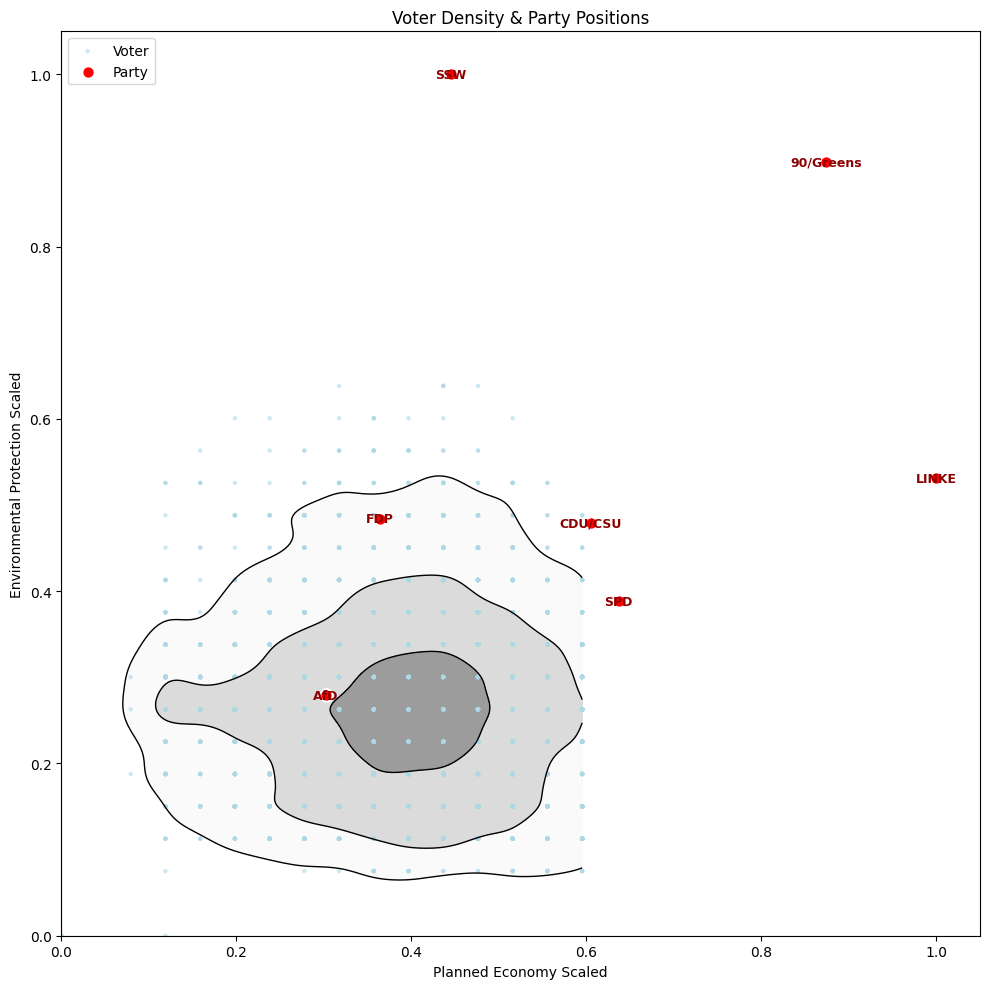

In [8]:
x_v = voter_scaled["Planned Economy Scaled"].values
y_v = voter_scaled["Environmental Protection Scaled"].values

# Stack the data into a 2×N array and hand it to SciPy’s gaussian_kde
xy = np.vstack([x_v, y_v])
# In two-dimensional KDE, the data points are smoothed in both dimensions, resulting in a surface that represents the joint probability density of the two variables
kde = gaussian_kde(xy, bw_method='scott')

# You build a 200×200 grid over the observed data‐range, evaluate the estimation at each grid point, and reshape back into a 2-D array zi
nbins = 200
xi = np.linspace(x_v.min(), x_v.max(), nbins)
yi = np.linspace(y_v.min(), y_v.max(), nbins)
xi, yi = np.meshgrid(xi, yi)
zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

# surface can be visualized using contour plots, where each contour line represents a region of constant density
levels = np.percentile(zi, [50, 75, 95])

plt.figure(figsize=(10, 10))
# filled contours
plt.contourf(xi, yi, zi,
             levels=[levels[0], levels[1], levels[2], zi.max()],
             cmap="Greys",    # or any sequential colormap
             alpha=0.5)
# outline the contour levels
plt.contour(xi, yi, zi, levels=levels, colors="k", linewidths=1)

# overlay the voter points 
plt.scatter(x_v, y_v, s=10, c="lightblue", edgecolor="none", alpha=0.6, label="Voter")

# overlay the party means
px = party_scaled["Planned Economy Scaled"].values
py = party_scaled["Environmental Protection Scaled"].values
labels = party_scaled["Party_Name"].values

plt.scatter(px, py, s=80, c="red", edgecolor="white", linewidth=1.5, label="Party")
for name, x, y in zip(labels, px, py):
    plt.text(x, y, name, fontsize=9, fontweight="bold",
             ha="center", va="center", color="darkred")

plt.axhline(0, color="grey", lw=0.8)
plt.axvline(0, color="grey", lw=0.8)
plt.xlabel("Planned Economy Scaled")
plt.ylabel("Environmental Protection Scaled")
plt.title("Voter Density & Party Positions")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()